<a href="https://colab.research.google.com/github/rashwinr/MONAI_tutorials/blob/main/MONAI_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MONAI: Datasets

1. **Medical datasets are key to developing AI solutions for healthcare:** They provide the essential data for training and evaluating algorithms that can detect diseases, assist in diagnosis, and personalize treatment plans.
2. **Accessing and utilizing these datasets can be challenging:** Issues include large file sizes, complex formats, and the need for anonymization to protect patient privacy.
3. **MONAI simplifies this process:** This open-source framework offers tools and resources specifically designed for medical imaging data, streamlining tasks like data loading, preprocessing, and analysis, making it easier for researchers to work with these valuable datasets.




In [1]:
!pip show monai

In [2]:
!pip install monai[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.0/359.0 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.5/266.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 MB 10.6 MB/s eta 0:00:00


In [3]:
import monai
from monai.config import print_config
print_config()

MONAI version: 1.4.0
Numpy version: 1.26.4
Pytorch version: 2.4.1+cu121
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 46a5272196a6c2590ca2589029eed8e4d56ff008
MONAI __file__: /usr/local/lib/python3.10/dist-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.11
ITK version: 5.4.0
Nibabel version: 5.2.1
scikit-image version: 0.24.0
scipy version: 1.13.1
Pillow version: 10.4.0
Tensorboard version: 2.17.0
gdown version: 5.2.0
TorchVision version: 0.19.1+cu121
tqdm version: 4.66.5
lmdb version: 1.5.1
psutil version: 5.9.5
pandas version: 2.2.2
einops version: 0.8.0
transformers version: 4.40.2
mlflow version: 2.17.0
pynrrd version: 1.0.0
clearml version: 1.16.5rc2

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



## Create a dummy image

**Syntax**:
```python
monai.data.synthetic.create_test_image_2d(height, width, num_objs=12, num_seg_classes=1, channel_dim=3, random_state=None)
```

**Parameters**
________
**height** – height of the image.

**width** – width of the image.

**num_objs** – number of circles to generate. Defaults to 12.

**rad_max** – maximum circle radius. Defaults to 30.

**rad_min** – minimum circle radius. Defaults to 5.

**noise_max** – if greater than 0 then noise will be added to the image taken from the uniform distribution on range [0,noise_max). Defaults to 0.

**num_seg_classes** – number of classes for segmentations. Defaults to 5.

**channel_dim** – if None, create an image without channel dimension, otherwise create an image with channel dimension as first dim or last dim. Defaults to None.

**random_state** – the random generator to use. Defaults to np.random.



In [4]:
from monai.data import create_test_image_2d

image, seg = create_test_image_2d(height=128, width=128,num_objs=5,rad_max=10,rad_min=2,num_seg_classes=10)

print(f"Image shape: {image.shape}")
print(f"Segmentation shape: {seg.shape}")

print(f"Image min: {image.min()}, max: {image.max()}")
print(f"Segmentation min: {seg.min()}, max: {seg.max()}")

Image shape: (128, 128)
Segmentation shape: (128, 128)
Image min: 0.0, max: 1.0
Segmentation min: 0, max: 8


### Visualization

- Matplotlib has a number of built-in colormaps
- An intuitive color scheme for the parameter you are plotting
- More details on ``matplotlib.colormaps`` is available here: https://matplotlib.org/stable/users/explain/colors/colormaps.html


<img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_014.png">

In [5]:
from matplotlib import colormaps
# list(colormaps)

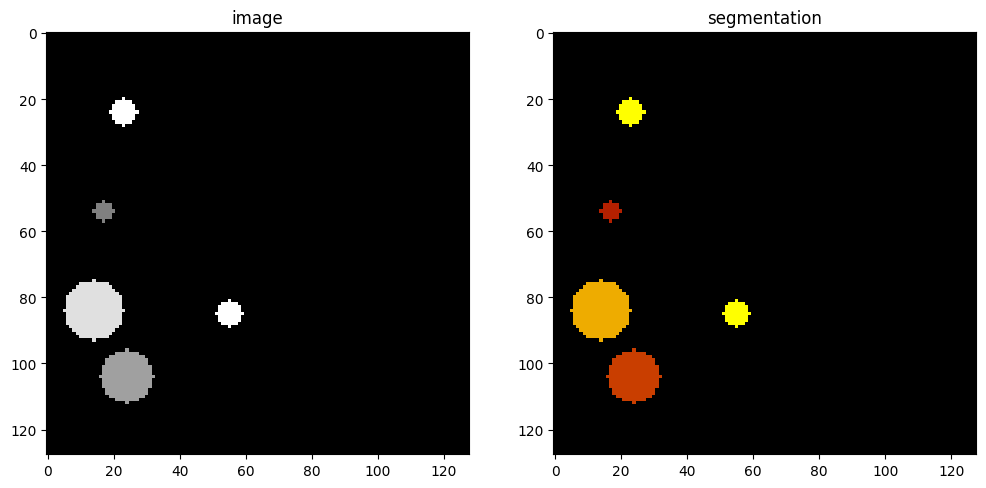

In [6]:
import matplotlib.pyplot as plt

plt.figure("visualize", (12, 6))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(image, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("segmentation")
plt.imshow(seg,cmap="gnuplot")
plt.show()

## Recap

- MONAI dataset
- MONAI transforms
- Working with medical images

### MONAI dataset

* Dataset: Combines data and its associated transform into a single entity
  * Syntax: ``Dataset(data,transform=None)``

    Where transform is an image or object manipulation that will be activated and acts on the data

In [7]:
from monai.data import Dataset

data = [
    {"image": image, "seg": seg}
]

# Define a dataset using the data list
dataset = Dataset(data=data)


print(f"Dataset length: {len(dataset)}")

# Access a data item by index
item = dataset[0]
print(f"Keys in item: {item.keys()}")

print(f"Image shape: {item['image'].shape}")
print(f"Segmentation shape: {item['seg'].shape}")


Dataset length: 1
Keys in item: dict_keys(['image', 'seg'])
Image shape: (128, 128)
Segmentation shape: (128, 128)


### Attributes of monai dataset


In [8]:
# prompt: view attributes of monai dataset variable dataset

# print(dir(dataset))

### MONAI transforms

In [9]:

import monai
from monai.transforms import Compose, EnsureChannelFirstd, ScaleIntensityd, ToTensord

# Define a transform to convert image and segmentation into tensors,
# ensure channel first and scale intensity
transform = Compose([
    EnsureChannelFirstd(keys=["image", "seg"],channel_dim="no_channel"),
    ScaleIntensityd(keys=["image", "seg"]),
    ToTensord(keys=["image", "seg"])
])

# Create a monai dataset with the transform
dataset = monai.data.Dataset(data=data, transform=transform)


# Access a data item by index
item = dataset[0]
print(f"Keys in item: {item.keys()}")

print(f"Image shape: {item['image'].shape}")
print(f"Segmentation shape: {item['seg'].shape}")

print(f"Image min: {item['image'].min()}, max: {item['image'].max()}")
print(f"Segmentation min: {item['seg'].min()}, max: {item['seg'].max()}")

Keys in item: dict_keys(['image', 'seg'])
Image shape: torch.Size([1, 128, 128])
Segmentation shape: torch.Size([1, 128, 128])
Image min: 0.0, max: 1.0
Segmentation min: 0.0, max: 1.0


## MONAI datasets

From MONAI Applications: ``class monai.apps``
- MEDNIST
- Medical Decathlon
- TCIA
- Others: MEDMNIST
- Others: PhysioNet

In [10]:
import os
dir_path = os.getcwd()
print(dir_path)

/content


### MEDNIST Dataset

The MedNIST dataset was gathered from several sets from [TCIA](https://wiki.cancerimagingarchive.net/display/Public/Data+Usage+Policies+and+Restrictions),
[the RSNA Bone Age Challenge](http://rsnachallenges.cloudapp.net/competitions/4),
and [the NIH Chest X-ray dataset](https://cloud.google.com/healthcare/docs/resources/public-datasets/nih-chest).

The dataset is kindly made available by [Dr. Bradley J. Erickson M.D., Ph.D.](https://www.mayo.edu/research/labs/radiology-informatics/overview) (Department of Radiology, Mayo Clinic)
under the Creative Commons [CC BY-SA 4.0 license](https://creativecommons.org/licenses/by-sa/4.0/). If you use the MedNIST dataset, please acknowledge the source.

Syntax: ``MedNISTDataset(root_dir, section, transform=(), download=False, seed=0, val_frac=0.1, test_frac=0.1, cache_num=9223372036854775807, cache_rate=1.0, num_workers=1, progress=True, copy_cache=True, as_contiguous=True, runtime_cache=False)``

**Parameters**:
- **root_dir** – target directory to download and load MedNIST dataset.
- **section** – expected data section, can be: training, validation or test.
- **download** – whether to download and extract the MedNIST from resource link, default is False. if expected file already exists, skip downloading even set it to True. user can manually copy MedNIST.tar.gz file or MedNIST folder to root directory.
- **seed** – random seed to randomly split training, validation and test datasets, default is 0.
- **val_frac** – percentage of validation fraction in the whole dataset, default is 0.1.
- **test_frac** – percentage of test fraction in the whole dataset, default is 0.1.

In [11]:
from monai.apps import MedNISTDataset
train_data = MedNISTDataset(root_dir=dir_path, section="training",download=True, seed=24, val_frac=0.1, test_frac=0.55)
val_data = MedNISTDataset(root_dir=dir_path, section="validation",download=False, seed=24, val_frac=0.1, test_frac=0.5)
test_data = MedNISTDataset(root_dir=dir_path, section="test",download=False, seed=24, val_frac=0.1, test_frac=0.5)


MedNIST.tar.gz: 59.0MB [00:01, 59.4MB/s]                            

2024-10-20 09:23:27,692 - INFO - Downloaded: /content/MedNIST.tar.gz


2024-10-20 09:23:27,826 - INFO - Verified 'MedNIST.tar.gz', md5: 0bc7306e7427e00ad1c5526a6677552d.
2024-10-20 09:23:27,829 - INFO - Writing into directory: /content.


Loading dataset: 100%|██████████| 29477/29477 [00:27<00:00, 1088.07it/s]


In [12]:
print(f"Length of training dataset: {len(train_data)}")
print(f"Length of validation dataset: {len(val_data)}")
print(f"Length of test dataset: {len(test_data)}")
print(f"Type of train data: {type(train_data)}")
# print(dir(train_data))
for data in val_data:
    image = data['image']
    label = data['label']
    # Print or inspect the 'image' and 'label'
    print(f"Image shape: {image.shape}, Label: {label}")

Streaming output truncated to the last 5000 lines.
Image shape: torch.Size([64, 64]), Label: 1
Image shape: torch.Size([64, 64]), Label: 0
Image shape: torch.Size([64, 64]), Label: 3
Image shape: torch.Size([64, 64]), Label: 3
Image shape: torch.Size([64, 64]), Label: 4
Image shape: torch.Size([64, 64]), Label: 5
Image shape: torch.Size([64, 64]), Label: 5
Image shape: torch.Size([64, 64]), Label: 0
Image shape: torch.Size([64, 64]), Label: 5
Image shape: torch.Size([64, 64]), Label: 4
Image shape: torch.Size([64, 64]), Label: 1
Image shape: torch.Size([64, 64]), Label: 2
Image shape: torch.Size([64, 64]), Label: 0
Image shape: torch.Size([64, 64]), Label: 5
Image shape: torch.Size([64, 64]), Label: 1
Image shape: torch.Size([64, 64]), Label: 3
Image shape: torch.Size([64, 64]), Label: 2
Image shape: torch.Size([64, 64]), Label: 2
Image shape: torch.Size([64, 64]), Label: 4
Image shape: torch.Size([64, 64]), Label: 2
Image shape: torch.Size([64, 64]), Label: 5
Image shape: torch.Size([

### Attributes of MONAI MEDNIST dataset variable

In [13]:
print(dir(train_data))

['R', '__add__', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_fill_cache', '_generate_data_list', '_hash_keys', '_is_protocol', '_load_cache_item', '_transform', 'as_contiguous', 'cache_num', 'compressed_file_name', 'copy_cache', 'data', 'dataset_folder_name', 'get_num_classes', 'hash_as_key', 'hash_func', 'md5', 'num_class', 'num_workers', 'progress', 'randomize', 'resource', 'runtime_cache', 'section', 'set_data', 'set_num', 'set_random_state', 'set_rate', 'test_frac', 'transform', 'val_frac']


#### Data exploration

First of all, check the dataset files and show some statistics.  
There are 6 folders in the dataset: Hand, AbdomenCT, CXR, ChestCT, BreastMRI, HeadCT, which should be used as the labels to train our classification model.

In [14]:
import os

mednist_folder = os.path.join(dir_path, 'MedNIST')

if os.path.exists(mednist_folder):
  for subfolder in os.listdir(mednist_folder):
    subfolder_path = os.path.join(mednist_folder, subfolder)
    if os.path.isdir(subfolder_path):
      print(f"Subfolder: {subfolder}")
else:
  print("MedNIST folder not found.")


Subfolder: AbdomenCT
Subfolder: CXR
Subfolder: Hand
Subfolder: HeadCT
Subfolder: ChestCT
Subfolder: BreastMRI


In [15]:
mednist_folder = os.path.join(dir_path, 'MedNIST')

if os.path.exists(mednist_folder):
  for subfolder in os.listdir(mednist_folder):
    subfolder_path = os.path.join(mednist_folder, subfolder)
    if os.path.isdir(subfolder_path):
      print(f"Subfolder: {subfolder}")
      file_count = 0
      file_types = {}
      for filename in os.listdir(subfolder_path):
        file_count += 1
        file_type = filename.split('.')[-1]
        if file_type in file_types:
          file_types[file_type] += 1
        else:
          file_types[file_type] = 1
      print(f"  Number of files: {file_count}")
      print(f"  File types and counts: {file_types}")
else:
  print("MedNIST folder not found.")


Subfolder: AbdomenCT
  Number of files: 10000
  File types and counts: {'jpeg': 10000}
Subfolder: CXR
  Number of files: 10000
  File types and counts: {'jpeg': 10000}
Subfolder: Hand
  Number of files: 10000
  File types and counts: {'jpeg': 10000}
Subfolder: HeadCT
  Number of files: 10000
  File types and counts: {'jpeg': 10000}
Subfolder: ChestCT
  Number of files: 10000
  File types and counts: {'jpeg': 10000}
Subfolder: BreastMRI
  Number of files: 8954
  File types and counts: {'jpeg': 8954}


  Image: /content/MedNIST/ChestCT/004133.jpeg, Size: 64 x 64
  Image: /content/MedNIST/ChestCT/000817.jpeg, Size: 64 x 64
  Image: /content/MedNIST/ChestCT/000477.jpeg, Size: 64 x 64
  Image: /content/MedNIST/ChestCT/005059.jpeg, Size: 64 x 64
  Image: /content/MedNIST/ChestCT/003037.jpeg, Size: 64 x 64
  Image: /content/MedNIST/ChestCT/005074.jpeg, Size: 64 x 64
  Image: /content/MedNIST/ChestCT/004387.jpeg, Size: 64 x 64
  Image: /content/MedNIST/ChestCT/006354.jpeg, Size: 64 x 64
  Image: /content/MedNIST/ChestCT/009086.jpeg, Size: 64 x 64
  Image: /content/MedNIST/ChestCT/005408.jpeg, Size: 64 x 64


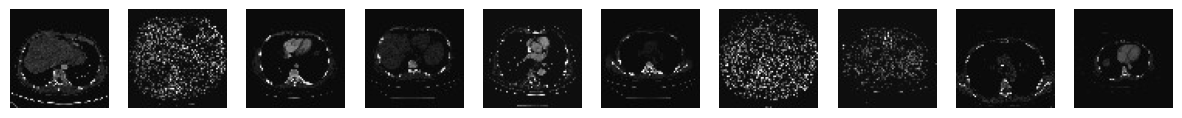

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image # Import the Image class from PIL

chestct_folder = os.path.join(mednist_folder, 'ChestCT')
if os.path.exists(chestct_folder):
  image_files = [os.path.join(chestct_folder, f) for f in os.listdir(chestct_folder) if f.endswith('.jpeg')]
  num_images_to_plot = 10

  plt.figure(figsize=(15, 5))
  for i in range(num_images_to_plot):
      image_path = image_files[i]
      image = plt.imread(image_path)
      plt.subplot(1, num_images_to_plot, i + 1)
      plt.imshow(image, cmap='gray')
      plt.axis('off')
      width, height = Image.open(image_path).size
      print(f"  Image: {image_path}, Size: {width} x {height}")

  plt.show()

else:
  print("ChestCT folder not found.")

  Image: /content/MedNIST/AbdomenCT/004133.jpeg, Size: 64 x 64
  Image: /content/MedNIST/AbdomenCT/000817.jpeg, Size: 64 x 64
  Image: /content/MedNIST/AbdomenCT/000477.jpeg, Size: 64 x 64
  Image: /content/MedNIST/AbdomenCT/005059.jpeg, Size: 64 x 64
  Image: /content/MedNIST/AbdomenCT/003037.jpeg, Size: 64 x 64
  Image: /content/MedNIST/AbdomenCT/005074.jpeg, Size: 64 x 64
  Image: /content/MedNIST/AbdomenCT/004387.jpeg, Size: 64 x 64
  Image: /content/MedNIST/AbdomenCT/006354.jpeg, Size: 64 x 64
  Image: /content/MedNIST/AbdomenCT/009086.jpeg, Size: 64 x 64
  Image: /content/MedNIST/AbdomenCT/005408.jpeg, Size: 64 x 64


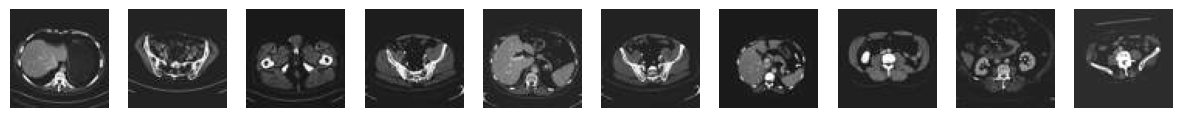

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image # Import the Image class from PIL

abdomenct_folder = os.path.join(mednist_folder, 'AbdomenCT')
if os.path.exists(abdomenct_folder):
  image_files = [os.path.join(abdomenct_folder, f) for f in os.listdir(abdomenct_folder) if f.endswith('.jpeg')]
  num_images_to_plot = 10

  plt.figure(figsize=(15, 5))
  for i in range(num_images_to_plot):
      image_path = image_files[i]
      image = plt.imread(image_path)
      plt.subplot(1, num_images_to_plot, i + 1)
      plt.imshow(image, cmap='gray')
      plt.axis('off')
      width, height = Image.open(image_path).size
      print(f"  Image: {image_path}, Size: {width} x {height}")

  plt.show()

else:
  print("AbdomenCT folder not found.")

  Image: /content/MedNIST/CXR/004133.jpeg, Size: 64 x 64
  Image: /content/MedNIST/CXR/000817.jpeg, Size: 64 x 64
  Image: /content/MedNIST/CXR/000477.jpeg, Size: 64 x 64
  Image: /content/MedNIST/CXR/005059.jpeg, Size: 64 x 64
  Image: /content/MedNIST/CXR/003037.jpeg, Size: 64 x 64
  Image: /content/MedNIST/CXR/005074.jpeg, Size: 64 x 64
  Image: /content/MedNIST/CXR/004387.jpeg, Size: 64 x 64
  Image: /content/MedNIST/CXR/006354.jpeg, Size: 64 x 64
  Image: /content/MedNIST/CXR/009086.jpeg, Size: 64 x 64
  Image: /content/MedNIST/CXR/005408.jpeg, Size: 64 x 64


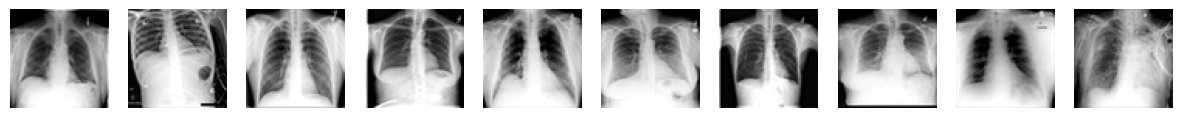

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image # Import the Image class from PIL

cxr_folder = os.path.join(mednist_folder, 'CXR')
if os.path.exists(cxr_folder):
  image_files = [os.path.join(cxr_folder, f) for f in os.listdir(cxr_folder) if f.endswith('.jpeg')]
  num_images_to_plot = 10

  plt.figure(figsize=(15, 5))
  for i in range(num_images_to_plot):
      image_path = image_files[i]
      image = plt.imread(image_path)
      width, height = Image.open(image_path).size
      print(f"  Image: {image_path}, Size: {width} x {height}")
      plt.subplot(1, num_images_to_plot, i + 1)
      plt.imshow(image, cmap='gray')
      plt.axis('off')

  plt.show()

else:
  print("CXR folder not found.")


### Decathlon datasets

- The Dataset command to automatically download the data of Medical Segmentation Decathlon challenge (http://medicaldecathlon.com/) and generate items for training, validation or test.

- It will also load these properties from the JSON config file of dataset.

- Syntax:
```python
DecathlonDataset(root_dir, task, section, download=False, seed=0, val_frac=0.2, progress=True)
```
Parameters:
- **root_dir** – local directory for caching and loading the MSD datasets.

- **task** – Task to download and execute: one item of the list
    - “Task01_BrainTumour”
    - “Task02_Heart”
    - “Task03_Liver”
    - “Task04_Hippocampus”
    - “Task05_Prostate”
    - “Task06_Lung”
    - “Task07_Pancreas”
    - “Task08_HepaticVessel”
    - “Task09_Spleen”
    - “Task10_Colon”

- **section** – expected data section: training or validation.

- **download** – whether to download and extract the Decathlon from resource link, default is False. if expected file already exists, skip downloading even set it to True. user can manually copy tar file or dataset folder to the root directory.

- **val_frac** – percentage of validation fraction in the whole dataset, default is 0.2.

- **seed** – random seed to randomly shuffle the datalist before splitting into training and validation, default is 0.
  - **Note**: Set same seed for training and validation sections.

- **progress** – whether to display a progress bar when downloading dataset and computing the transform cache content.



In [19]:

# prompt: from decathlon dataset please try to print task id for each dataset using monai

from monai.apps import DecathlonDataset

# Specify the task number you want to access (e.g., Task04_Hippocampus)
task_num = "Task04_Hippocampus"

# Create a DecathlonDataset instance for the specified task
train_decathlondataset = DecathlonDataset(root_dir=dir_path, task=task_num, section="training", download=True,val_frac=0.1)
validation_decathlondataset = DecathlonDataset(root_dir=dir_path, task=task_num, section="validation", download=False,val_frac=0.1)

Task04_Hippocampus.tar: 27.1MB [00:01, 20.7MB/s]                            

2024-10-20 09:24:51,980 - INFO - Downloaded: /content/Task04_Hippocampus.tar


2024-10-20 09:24:52,045 - INFO - Verified 'Task04_Hippocampus.tar', md5: 9d24dba78a72977dbd1d2e110310f31b.
2024-10-20 09:24:52,048 - INFO - Writing into directory: /content.


Loading dataset: 100%|██████████| 26/26 [00:00<00:00, 154.86it/s]


In [20]:
print(f"The length of the training dataset is {len(train_decathlondataset)} and the type of vaiable is {type(train_decathlondataset)}")
print(f"The length of the validation dataset is {len(validation_decathlondataset)} and the type of vaiable is {type(validation_decathlondataset)}")
print(dir(validation_decathlondataset))
# Access the 'image' and 'label' dictionaries
for i in range(len(validation_decathlondataset)):
    data = validation_decathlondataset[i]
    image = data["image"]
    label = data["label"]
    print(f"Image: {image.shape}, Label: {label.shape}")

The length of the training dataset is 234 and the type of vaiable is <class 'monai.apps.datasets.DecathlonDataset'>
The length of the validation dataset is 26 and the type of vaiable is <class 'monai.apps.datasets.DecathlonDataset'>
['R', '__add__', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_fill_cache', '_generate_data_list', '_hash_keys', '_is_protocol', '_load_cache_item', '_properties', '_split_datalist', '_transform', 'as_contiguous', 'cache_num', 'copy_cache', 'data', 'get_indices', 'get_properties', 'hash_as_key', 'hash_func', 'indices', 'md5', 'num_workers',

### TCIA Dataset

- The Dataset to automatically download the data from a public The Cancer Imaging Archive (TCIA) dataset and generate items for training, validation or test. [https://www.cancerimagingarchive.net/](https://www.cancerimagingarchive.net/)
- Syntax:
```Python
class monai.apps.TciaDataset(root_dir, collection, section, transform=(), download=False)
```

- **Massive Public Database**: TCIA provides a huge collection of de-identified medical images (like CT scans, MRIs, and histopathology slides) across a wide range of cancer types. This allows researchers to access diverse data for analysis, development of image-based diagnostic tools, and discovery of new disease insights.

- **Open and Free**: All the data in TCIA is freely available to the public. This open access promotes collaboration, accelerates research, and encourages the development of innovative cancer imaging applications.

- **Standardized Format**: TCIA uses the DICOM (Digital Imaging and Communications in Medicine) standard for storing and distributing images. This ensures compatibility and makes it easier for researchers to use the data with various image processing and analysis tools.

In [21]:
# prompt: import collection="Lung Phantom" from TciaDataset using monai
!pip install pydicom
import pydicom
from monai.apps import TciaDataset

# Specify the collection you want to access (e.g., "Lung Phantom")
collection = "Lung Phantom"

# Create a TciaDataset instance for the specified collection
tcia_dataset = TciaDataset(root_dir=dir_path, collection=collection, section="training", download=True)



1.2.276.0.7230010.3.1.3.0.32669.1424671831.707479.zip: 24.0kB [00:00, 56.8kB/s]

2024-10-20 09:24:59,718 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32669.1424671831.707479.zip
2024-10-20 09:24:59,720 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32669.1424671831.707479.zip.
2024-10-20 09:24:59,723 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32669.1424671831.707479.



1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip: 62.7MB [00:10, 6.01MB/s]

2024-10-20 09:25:10,904 - INFO - Downloaded: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip
2024-10-20 09:25:10,909 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:10,913 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.



1.2.276.0.7230010.3.1.3.0.33454.1424693226.234087.zip: 16.0kB [00:00, 41.6kB/s]

2024-10-20 09:25:12,997 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33454.1424693226.234087.zip
2024-10-20 09:25:12,999 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33454.1424693226.234087.zip.
2024-10-20 09:25:13,001 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33454.1424693226.234087.


2024-10-20 09:25:13,344 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:13,346 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:13,349 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33320.1424693022.227177.zip: 16.0kB [00:00, 53.8kB/s]

2024-10-20 09:25:15,352 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33320.1424693022.227177.zip
2024-10-20 09:25:15,354 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33320.1424693022.227177.zip.
2024-10-20 09:25:15,355 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33320.1424693022.227177.


2024-10-20 09:25:15,676 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:15,680 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:15,684 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34140.1424694437.896070.zip: 16.0kB [00:00, 25.7kB/s]

2024-10-20 09:25:18,119 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34140.1424694437.896070.zip
2024-10-20 09:25:18,120 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34140.1424694437.896070.zip.
2024-10-20 09:25:18,122 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34140.1424694437.896070.


2024-10-20 09:25:18,319 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:18,321 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:18,325 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32718.1424678386.823192.zip: 16.0kB [00:00, 48.5kB/s]

2024-10-20 09:25:19,906 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32718.1424678386.823192.zip
2024-10-20 09:25:19,908 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32718.1424678386.823192.zip.
2024-10-20 09:25:19,910 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32718.1424678386.823192.


2024-10-20 09:25:20,117 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:20,118 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:20,122 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32524.1424660837.21515.zip: 24.0kB [00:00, 73.8kB/s]

2024-10-20 09:25:21,734 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32524.1424660837.21515.zip
2024-10-20 09:25:21,736 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32524.1424660837.21515.zip.
2024-10-20 09:25:21,739 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32524.1424660837.21515.


2024-10-20 09:25:22,511 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:22,517 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:22,519 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32176.1424660182.690094.zip: 16.0kB [00:00, 27.8kB/s]

2024-10-20 09:25:24,353 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32176.1424660182.690094.zip
2024-10-20 09:25:24,355 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32176.1424660182.690094.zip.
2024-10-20 09:25:24,357 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32176.1424660182.690094.


2024-10-20 09:25:24,581 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:24,583 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:24,586 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34020.1424694191.49892.zip: 16.0kB [00:00, 52.6kB/s]

2024-10-20 09:25:26,248 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34020.1424694191.49892.zip
2024-10-20 09:25:26,250 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34020.1424694191.49892.zip.
2024-10-20 09:25:26,252 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34020.1424694191.49892.


2024-10-20 09:25:26,487 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:26,488 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:26,492 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32504.1424660797.273462.zip: 24.0kB [00:00, 47.8kB/s]

2024-10-20 09:25:28,278 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32504.1424660797.273462.zip
2024-10-20 09:25:28,279 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32504.1424660797.273462.zip.
2024-10-20 09:25:28,280 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32504.1424660797.273462.


2024-10-20 09:25:28,610 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:28,612 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:28,615 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33998.1424694147.469199.zip: 16.0kB [00:00, 38.1kB/s]

2024-10-20 09:25:30,733 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33998.1424694147.469199.zip
2024-10-20 09:25:30,734 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33998.1424694147.469199.zip.
2024-10-20 09:25:30,738 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33998.1424694147.469199.


2024-10-20 09:25:31,015 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:31,016 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:31,020 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33739.1424693706.776221.zip: 16.0kB [00:00, 34.0kB/s]

2024-10-20 09:25:32,769 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33739.1424693706.776221.zip
2024-10-20 09:25:32,770 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33739.1424693706.776221.zip.
2024-10-20 09:25:32,772 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33739.1424693706.776221.


2024-10-20 09:25:32,969 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:32,971 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:32,973 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33977.1424694116.118989.zip: 16.0kB [00:00, 40.9kB/s]

2024-10-20 09:25:34,653 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33977.1424694116.118989.zip
2024-10-20 09:25:34,655 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33977.1424694116.118989.zip.
2024-10-20 09:25:34,656 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33977.1424694116.118989.


2024-10-20 09:25:34,876 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:34,878 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:34,881 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33258.1424692912.306174.zip: 16.0kB [00:00, 35.0kB/s]

2024-10-20 09:25:36,604 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33258.1424692912.306174.zip
2024-10-20 09:25:36,605 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33258.1424692912.306174.zip.
2024-10-20 09:25:36,606 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33258.1424692912.306174.


2024-10-20 09:25:36,824 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:36,826 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:36,828 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32156.1424660130.401591.zip: 16.0kB [00:00, 47.7kB/s]

2024-10-20 09:25:38,469 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32156.1424660130.401591.zip
2024-10-20 09:25:38,473 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32156.1424660130.401591.zip.
2024-10-20 09:25:38,475 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32156.1424660130.401591.


2024-10-20 09:25:38,708 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:38,709 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:38,714 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34240.1424694596.434564.zip: 16.0kB [00:00, 51.8kB/s]

2024-10-20 09:25:40,396 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34240.1424694596.434564.zip
2024-10-20 09:25:40,400 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34240.1424694596.434564.zip.
2024-10-20 09:25:40,402 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34240.1424694596.434564.


2024-10-20 09:25:40,642 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:40,644 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:40,648 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33952.1424694084.417307.zip: 16.0kB [00:00, 47.1kB/s]

2024-10-20 09:25:42,790 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33952.1424694084.417307.zip
2024-10-20 09:25:42,792 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33952.1424694084.417307.zip.
2024-10-20 09:25:42,794 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33952.1424694084.417307.


2024-10-20 09:25:43,136 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:43,138 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:43,140 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33474.1424693267.139001.zip: 16.0kB [00:00, 50.6kB/s]

2024-10-20 09:25:45,194 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33474.1424693267.139001.zip
2024-10-20 09:25:45,196 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33474.1424693267.139001.zip.
2024-10-20 09:25:45,202 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33474.1424693267.139001.


2024-10-20 09:25:45,413 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:45,414 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:45,418 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32342.1424660479.49332.zip: 16.0kB [00:00, 40.8kB/s]

2024-10-20 09:25:47,055 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32342.1424660479.49332.zip
2024-10-20 09:25:47,057 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32342.1424660479.49332.zip.
2024-10-20 09:25:47,060 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32342.1424660479.49332.


2024-10-20 09:25:47,287 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:47,288 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:47,292 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32322.1424660446.720973.zip: 16.0kB [00:00, 34.7kB/s]

2024-10-20 09:25:49,009 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32322.1424660446.720973.zip
2024-10-20 09:25:49,010 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32322.1424660446.720973.zip.
2024-10-20 09:25:49,013 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32322.1424660446.720973.


2024-10-20 09:25:49,224 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:49,231 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:49,234 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34385.1424694833.427424.zip: 16.0kB [00:00, 46.4kB/s]

2024-10-20 09:25:50,885 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34385.1424694833.427424.zip
2024-10-20 09:25:50,888 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34385.1424694833.427424.zip.
2024-10-20 09:25:50,890 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34385.1424694833.427424.


2024-10-20 09:25:51,091 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:51,093 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:51,096 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34365.1424694800.882404.zip: 16.0kB [00:00, 46.6kB/s]

2024-10-20 09:25:52,726 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34365.1424694800.882404.zip
2024-10-20 09:25:52,727 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34365.1424694800.882404.zip.
2024-10-20 09:25:52,729 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34365.1424694800.882404.


2024-10-20 09:25:53,502 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:53,504 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:53,507 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34220.1424694565.324590.zip: 16.0kB [00:00, 47.7kB/s]

2024-10-20 09:25:55,105 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34220.1424694565.324590.zip
2024-10-20 09:25:55,107 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34220.1424694565.324590.zip.
2024-10-20 09:25:55,108 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34220.1424694565.324590.


2024-10-20 09:25:55,478 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:55,484 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:55,486 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33514.1424693332.840704.zip: 16.0kB [00:00, 45.8kB/s]

2024-10-20 09:25:57,606 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33514.1424693332.840704.zip
2024-10-20 09:25:57,610 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33514.1424693332.840704.zip.
2024-10-20 09:25:57,612 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33514.1424693332.840704.


2024-10-20 09:25:57,955 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:25:57,960 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:25:57,961 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33594.1424693484.359510.zip: 16.0kB [00:00, 25.7kB/s]

2024-10-20 09:26:00,042 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33594.1424693484.359510.zip
2024-10-20 09:26:00,043 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33594.1424693484.359510.zip.
2024-10-20 09:26:00,045 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33594.1424693484.359510.


2024-10-20 09:26:00,251 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:00,253 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:00,255 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33929.1424694053.69084.zip: 16.0kB [00:00, 34.4kB/s]

2024-10-20 09:26:02,028 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33929.1424694053.69084.zip
2024-10-20 09:26:02,030 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33929.1424694053.69084.zip.
2024-10-20 09:26:02,032 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33929.1424694053.69084.


2024-10-20 09:26:02,235 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:02,236 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:02,239 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34040.1424694232.931888.zip: 16.0kB [00:00, 38.4kB/s]

2024-10-20 09:26:03,922 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34040.1424694232.931888.zip
2024-10-20 09:26:03,924 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34040.1424694232.931888.zip.
2024-10-20 09:26:03,925 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34040.1424694232.931888.


2024-10-20 09:26:04,150 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:04,152 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:04,157 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33676.1424693607.913924.zip: 16.0kB [00:00, 43.3kB/s]

2024-10-20 09:26:05,824 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33676.1424693607.913924.zip
2024-10-20 09:26:05,825 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33676.1424693607.913924.zip.
2024-10-20 09:26:05,827 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33676.1424693607.913924.


2024-10-20 09:26:06,039 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:06,040 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:06,043 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32815.1424692265.541921.zip: 16.0kB [00:00, 54.0kB/s]

2024-10-20 09:26:07,606 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32815.1424692265.541921.zip
2024-10-20 09:26:07,610 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32815.1424692265.541921.zip.
2024-10-20 09:26:07,612 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32815.1424692265.541921.


2024-10-20 09:26:07,839 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:07,840 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:07,845 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33434.1424693180.944772.zip: 16.0kB [00:00, 51.0kB/s]

2024-10-20 09:26:09,707 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33434.1424693180.944772.zip
2024-10-20 09:26:09,709 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33434.1424693180.944772.zip.
2024-10-20 09:26:09,713 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33434.1424693180.944772.


2024-10-20 09:26:10,088 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:10,091 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:10,094 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32362.1424660512.59967.zip: 16.0kB [00:00, 53.3kB/s]

2024-10-20 09:26:12,144 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32362.1424660512.59967.zip
2024-10-20 09:26:12,147 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32362.1424660512.59967.zip.
2024-10-20 09:26:12,150 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32362.1424660512.59967.


2024-10-20 09:26:12,373 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:12,375 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:12,378 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33718.1424693671.455729.zip: 16.0kB [00:00, 50.8kB/s]

2024-10-20 09:26:13,985 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33718.1424693671.455729.zip
2024-10-20 09:26:13,986 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33718.1424693671.455729.zip.
2024-10-20 09:26:13,987 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33718.1424693671.455729.


2024-10-20 09:26:14,214 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:14,216 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:14,219 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33238.1424692877.855206.zip: 16.0kB [00:00, 44.9kB/s]

2024-10-20 09:26:15,882 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33238.1424692877.855206.zip
2024-10-20 09:26:15,884 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33238.1424692877.855206.zip.
2024-10-20 09:26:15,885 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33238.1424692877.855206.


2024-10-20 09:26:16,093 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:16,094 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:16,098 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32766.1424691418.873582.zip: 16.0kB [00:00, 51.3kB/s]

2024-10-20 09:26:17,702 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32766.1424691418.873582.zip
2024-10-20 09:26:17,703 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32766.1424691418.873582.zip.
2024-10-20 09:26:17,705 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32766.1424691418.873582.


2024-10-20 09:26:17,913 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:17,914 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:17,917 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32649.1424667545.918537.zip: 24.0kB [00:00, 56.4kB/s]

2024-10-20 09:26:19,593 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32649.1424667545.918537.zip
2024-10-20 09:26:19,595 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32649.1424667545.918537.zip.
2024-10-20 09:26:19,596 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32649.1424667545.918537.


2024-10-20 09:26:20,378 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:20,379 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:20,382 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33390.1424693108.534687.zip: 16.0kB [00:00, 49.1kB/s]

2024-10-20 09:26:21,966 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33390.1424693108.534687.zip
2024-10-20 09:26:21,967 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33390.1424693108.534687.zip.
2024-10-20 09:26:21,969 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33390.1424693108.534687.


2024-10-20 09:26:22,245 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:22,251 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:22,254 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32484.1424660756.838781.zip: 16.0kB [00:00, 51.5kB/s]

2024-10-20 09:26:24,258 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32484.1424660756.838781.zip
2024-10-20 09:26:24,260 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32484.1424660756.838781.zip.
2024-10-20 09:26:24,263 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32484.1424660756.838781.


2024-10-20 09:26:24,633 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:24,639 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:24,644 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32961.1424692403.124392.zip: 16.0kB [00:00, 43.3kB/s]

2024-10-20 09:26:26,775 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32961.1424692403.124392.zip
2024-10-20 09:26:26,777 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32961.1424692403.124392.zip.
2024-10-20 09:26:26,780 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32961.1424692403.124392.


2024-10-20 09:26:26,997 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:26,999 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:27,003 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32854.1424692304.205050.zip: 16.0kB [00:00, 44.3kB/s]

2024-10-20 09:26:28,637 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32854.1424692304.205050.zip
2024-10-20 09:26:28,639 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32854.1424692304.205050.zip.
2024-10-20 09:26:28,641 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32854.1424692304.205050.


2024-10-20 09:26:28,884 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:28,887 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:28,889 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34446.1424694949.776327.zip: 16.0kB [00:00, 22.8kB/s]

2024-10-20 09:26:30,925 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34446.1424694949.776327.zip
2024-10-20 09:26:30,927 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34446.1424694949.776327.zip.
2024-10-20 09:26:30,928 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34446.1424694949.776327.


2024-10-20 09:26:31,150 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:31,152 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:31,155 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33115.1424692659.681494.zip: 16.0kB [00:00, 44.9kB/s]

2024-10-20 09:26:32,841 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33115.1424692659.681494.zip
2024-10-20 09:26:32,842 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33115.1424692659.681494.zip.
2024-10-20 09:26:32,844 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33115.1424692659.681494.


2024-10-20 09:26:33,075 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:33,077 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:33,080 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32695.1424678354.554202.zip: 16.0kB [00:00, 23.9kB/s]

2024-10-20 09:26:35,040 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32695.1424678354.554202.zip
2024-10-20 09:26:35,042 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32695.1424678354.554202.zip.
2024-10-20 09:26:35,044 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32695.1424678354.554202.


2024-10-20 09:26:35,292 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:35,294 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:35,297 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33195.1424692800.140209.zip: 16.0kB [00:00, 44.7kB/s]

2024-10-20 09:26:36,957 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33195.1424692800.140209.zip
2024-10-20 09:26:36,959 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33195.1424692800.140209.zip.
2024-10-20 09:26:36,961 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33195.1424692800.140209.


2024-10-20 09:26:37,287 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:37,293 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:37,295 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33574.1424693453.857842.zip: 16.0kB [00:00, 47.1kB/s]

2024-10-20 09:26:39,360 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33574.1424693453.857842.zip
2024-10-20 09:26:39,361 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33574.1424693453.857842.zip.
2024-10-20 09:26:39,362 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33574.1424693453.857842.


2024-10-20 09:26:39,697 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:39,700 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:39,702 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33867.1424693930.238171.zip: 16.0kB [00:00, 33.9kB/s]

2024-10-20 09:26:41,507 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33867.1424693930.238171.zip
2024-10-20 09:26:41,508 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33867.1424693930.238171.zip.
2024-10-20 09:26:41,510 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33867.1424693930.238171.


2024-10-20 09:26:41,711 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:41,712 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:41,715 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33614.1424693515.394061.zip: 16.0kB [00:00, 27.3kB/s]

2024-10-20 09:26:43,660 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33614.1424693515.394061.zip
2024-10-20 09:26:43,662 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33614.1424693515.394061.zip.
2024-10-20 09:26:43,663 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33614.1424693515.394061.


2024-10-20 09:26:43,869 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:43,870 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:43,876 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33001.1424692464.432782.zip: 16.0kB [00:00, 47.9kB/s]

2024-10-20 09:26:45,480 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33001.1424692464.432782.zip
2024-10-20 09:26:45,481 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33001.1424692464.432782.zip.
2024-10-20 09:26:45,483 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33001.1424692464.432782.


2024-10-20 09:26:45,689 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:45,690 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:45,694 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32739.1424684894.783234.zip: 16.0kB [00:00, 37.2kB/s]

2024-10-20 09:26:47,372 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32739.1424684894.783234.zip
2024-10-20 09:26:47,375 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32739.1424684894.783234.zip.
2024-10-20 09:26:47,377 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32739.1424684894.783234.


2024-10-20 09:26:47,592 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:47,595 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:47,598 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33054.1424692550.682606.zip: 16.0kB [00:00, 45.4kB/s]

2024-10-20 09:26:49,230 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33054.1424692550.682606.zip
2024-10-20 09:26:49,232 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33054.1424692550.682606.zip.
2024-10-20 09:26:49,234 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33054.1424692550.682606.


2024-10-20 09:26:49,448 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:49,449 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:49,453 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34406.1424694865.116179.zip: 16.0kB [00:00, 46.8kB/s]

2024-10-20 09:26:51,381 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34406.1424694865.116179.zip
2024-10-20 09:26:51,382 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34406.1424694865.116179.zip.
2024-10-20 09:26:51,384 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34406.1424694865.116179.


2024-10-20 09:26:52,440 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:52,445 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:52,448 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33785.1424693780.719180.zip: 16.0kB [00:00, 47.6kB/s]

2024-10-20 09:26:54,333 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33785.1424693780.719180.zip
2024-10-20 09:26:54,335 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33785.1424693780.719180.zip.
2024-10-20 09:26:54,336 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33785.1424693780.719180.


2024-10-20 09:26:54,567 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:54,568 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:54,573 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33074.1424692583.78137.zip: 16.0kB [00:00, 44.8kB/s]

2024-10-20 09:26:56,230 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33074.1424692583.78137.zip
2024-10-20 09:26:56,233 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33074.1424692583.78137.zip.
2024-10-20 09:26:56,235 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33074.1424692583.78137.


2024-10-20 09:26:56,470 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:56,471 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:56,475 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32115.1424660059.231627.zip: 16.0kB [00:00, 47.5kB/s]

2024-10-20 09:26:58,152 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32115.1424660059.231627.zip
2024-10-20 09:26:58,154 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32115.1424660059.231627.zip.
2024-10-20 09:26:58,155 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32115.1424660059.231627.


2024-10-20 09:26:58,364 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:26:58,365 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:26:58,370 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33909.1424694018.731110.zip: 16.0kB [00:00, 47.1kB/s]

2024-10-20 09:26:59,975 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33909.1424694018.731110.zip
2024-10-20 09:26:59,977 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33909.1424694018.731110.zip.
2024-10-20 09:26:59,978 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33909.1424694018.731110.


2024-10-20 09:27:00,192 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:00,193 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:00,197 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32423.1424660650.923422.zip: 16.0kB [00:00, 51.1kB/s]

2024-10-20 09:27:01,793 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32423.1424660650.923422.zip
2024-10-20 09:27:01,794 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32423.1424660650.923422.zip.
2024-10-20 09:27:01,795 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32423.1424660650.923422.


2024-10-20 09:27:02,005 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:02,007 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:02,010 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32604.1424661001.369942.zip: 24.0kB [00:00, 65.7kB/s]

2024-10-20 09:27:03,675 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32604.1424661001.369942.zip
2024-10-20 09:27:03,676 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32604.1424661001.369942.zip.
2024-10-20 09:27:03,677 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32604.1424661001.369942.


2024-10-20 09:27:04,012 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:04,018 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:04,021 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33218.1424692845.821555.zip: 16.0kB [00:00, 22.7kB/s]

2024-10-20 09:27:06,440 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33218.1424692845.821555.zip
2024-10-20 09:27:06,441 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33218.1424692845.821555.zip.
2024-10-20 09:27:06,443 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33218.1424692845.821555.


2024-10-20 09:27:06,705 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:06,706 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:06,710 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33278.1424692943.731552.zip: 16.0kB [00:00, 49.6kB/s]

2024-10-20 09:27:08,312 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33278.1424692943.731552.zip
2024-10-20 09:27:08,315 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33278.1424692943.731552.zip.
2024-10-20 09:27:08,316 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33278.1424692943.731552.


2024-10-20 09:27:08,531 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:08,533 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:08,536 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32382.1424660552.503189.zip: 16.0kB [00:00, 34.6kB/s]

2024-10-20 09:27:10,252 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32382.1424660552.503189.zip
2024-10-20 09:27:10,253 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32382.1424660552.503189.zip.
2024-10-20 09:27:10,254 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32382.1424660552.503189.


2024-10-20 09:27:10,482 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:10,483 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:10,486 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33155.1424692731.81470.zip: 16.0kB [00:00, 46.7kB/s]

2024-10-20 09:27:12,111 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33155.1424692731.81470.zip
2024-10-20 09:27:12,113 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33155.1424692731.81470.zip.
2024-10-20 09:27:12,115 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33155.1424692731.81470.


2024-10-20 09:27:12,331 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:12,332 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:12,335 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32627.1424667513.975217.zip: 24.0kB [00:00, 63.6kB/s]

2024-10-20 09:27:14,033 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32627.1424667513.975217.zip
2024-10-20 09:27:14,037 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32627.1424667513.975217.zip.
2024-10-20 09:27:14,039 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32627.1424667513.975217.


2024-10-20 09:27:14,259 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:14,260 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:14,262 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34200.1424694533.952438.zip: 16.0kB [00:00, 40.2kB/s]

2024-10-20 09:27:15,945 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34200.1424694533.952438.zip
2024-10-20 09:27:15,946 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34200.1424694533.952438.zip.
2024-10-20 09:27:15,950 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34200.1424694533.952438.


2024-10-20 09:27:16,153 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:16,154 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:16,160 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34100.1424694357.206064.zip: 16.0kB [00:00, 45.6kB/s]

2024-10-20 09:27:18,108 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34100.1424694357.206064.zip
2024-10-20 09:27:18,110 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34100.1424694357.206064.zip.
2024-10-20 09:27:18,111 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34100.1424694357.206064.


2024-10-20 09:27:18,460 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:18,464 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:18,469 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33030.1424692503.452019.zip: 16.0kB [00:00, 50.6kB/s]

2024-10-20 09:27:20,502 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33030.1424692503.452019.zip
2024-10-20 09:27:20,504 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33030.1424692503.452019.zip.
2024-10-20 09:27:20,505 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33030.1424692503.452019.


2024-10-20 09:27:21,277 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:21,278 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:21,282 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33845.1424693899.363595.zip: 16.0kB [00:00, 48.5kB/s]

2024-10-20 09:27:22,884 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33845.1424693899.363595.zip
2024-10-20 09:27:22,887 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33845.1424693899.363595.zip.
2024-10-20 09:27:22,889 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33845.1424693899.363595.


2024-10-20 09:27:23,092 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:23,094 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:23,097 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34262.1424694627.796835.zip: 16.0kB [00:00, 24.5kB/s]

2024-10-20 09:27:25,010 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34262.1424694627.796835.zip
2024-10-20 09:27:25,012 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34262.1424694627.796835.zip.
2024-10-20 09:27:25,014 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34262.1424694627.796835.


2024-10-20 09:27:25,255 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:25,256 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:25,261 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32216.1424660259.669498.zip: 16.0kB [00:00, 41.0kB/s]

2024-10-20 09:27:26,965 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32216.1424660259.669498.zip
2024-10-20 09:27:26,967 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32216.1424660259.669498.zip.
2024-10-20 09:27:26,970 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32216.1424660259.669498.


2024-10-20 09:27:27,180 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:27,181 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:27,184 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34060.1424694264.193820.zip: 16.0kB [00:00, 46.9kB/s]

2024-10-20 09:27:28,797 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34060.1424694264.193820.zip
2024-10-20 09:27:28,798 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34060.1424694264.193820.zip.
2024-10-20 09:27:28,799 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34060.1424694264.193820.


2024-10-20 09:27:29,032 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:29,033 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:29,039 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32196.1424660220.437603.zip: 16.0kB [00:00, 25.0kB/s]

2024-10-20 09:27:30,930 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32196.1424660220.437603.zip
2024-10-20 09:27:30,933 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32196.1424660220.437603.zip.
2024-10-20 09:27:30,935 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32196.1424660220.437603.


2024-10-20 09:27:31,300 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:31,303 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:31,307 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32896.1424692369.660109.zip: 16.0kB [00:00, 47.4kB/s]

2024-10-20 09:27:33,352 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32896.1424692369.660109.zip
2024-10-20 09:27:33,354 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32896.1424692369.660109.zip.
2024-10-20 09:27:33,356 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32896.1424692369.660109.


2024-10-20 09:27:33,686 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:33,687 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:33,692 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34466.1424694980.893134.zip: 16.0kB [00:00, 48.0kB/s]

2024-10-20 09:27:35,293 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34466.1424694980.893134.zip
2024-10-20 09:27:35,294 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34466.1424694980.893134.zip.
2024-10-20 09:27:35,298 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34466.1424694980.893134.


2024-10-20 09:27:35,513 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:35,514 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:35,517 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33887.1424693972.289679.zip: 16.0kB [00:00, 46.0kB/s]

2024-10-20 09:27:37,101 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33887.1424693972.289679.zip
2024-10-20 09:27:37,103 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33887.1424693972.289679.zip.
2024-10-20 09:27:37,105 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33887.1424693972.289679.


2024-10-20 09:27:37,315 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:37,316 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:37,320 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33367.1424693059.490243.zip: 16.0kB [00:00, 47.4kB/s]

2024-10-20 09:27:38,985 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33367.1424693059.490243.zip
2024-10-20 09:27:38,988 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33367.1424693059.490243.zip.
2024-10-20 09:27:38,990 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33367.1424693059.490243.


2024-10-20 09:27:39,204 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:39,206 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:39,208 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34160.1424694470.354273.zip: 16.0kB [00:00, 37.9kB/s]

2024-10-20 09:27:40,889 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34160.1424694470.354273.zip
2024-10-20 09:27:40,891 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34160.1424694470.354273.zip.
2024-10-20 09:27:40,894 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34160.1424694470.354273.


2024-10-20 09:27:41,109 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:41,110 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:41,113 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32443.1424660691.32617.zip: 16.0kB [00:00, 43.1kB/s]

2024-10-20 09:27:42,743 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32443.1424660691.32617.zip
2024-10-20 09:27:42,747 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32443.1424660691.32617.zip.
2024-10-20 09:27:42,749 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32443.1424660691.32617.


2024-10-20 09:27:42,978 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:42,980 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:42,983 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32981.1424692434.488952.zip: 16.0kB [00:00, 34.2kB/s]

2024-10-20 09:27:44,980 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32981.1424692434.488952.zip
2024-10-20 09:27:44,982 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32981.1424692434.488952.zip.
2024-10-20 09:27:44,984 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32981.1424692434.488952.


2024-10-20 09:27:45,333 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:45,336 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:45,338 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32564.1424660919.866712.zip: 24.0kB [00:00, 77.7kB/s]

2024-10-20 09:27:47,343 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32564.1424660919.866712.zip
2024-10-20 09:27:47,344 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32564.1424660919.866712.zip.
2024-10-20 09:27:47,345 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32564.1424660919.866712.


2024-10-20 09:27:47,588 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:47,590 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:47,593 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32544.1424660878.856551.zip: 24.0kB [00:00, 39.4kB/s]

2024-10-20 09:27:49,490 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32544.1424660878.856551.zip
2024-10-20 09:27:49,492 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32544.1424660878.856551.zip.
2024-10-20 09:27:49,493 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32544.1424660878.856551.


2024-10-20 09:27:49,715 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:49,717 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:49,722 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33634.1424693545.895085.zip: 16.0kB [00:00, 51.8kB/s]

2024-10-20 09:27:51,333 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33634.1424693545.895085.zip
2024-10-20 09:27:51,336 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33634.1424693545.895085.zip.
2024-10-20 09:27:51,338 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33634.1424693545.895085.


2024-10-20 09:27:52,106 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:52,108 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:52,110 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33805.1424693813.955685.zip: 16.0kB [00:00, 34.3kB/s]

2024-10-20 09:27:53,879 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33805.1424693813.955685.zip
2024-10-20 09:27:53,880 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33805.1424693813.955685.zip.
2024-10-20 09:27:53,882 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33805.1424693813.955685.


2024-10-20 09:27:54,087 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:54,088 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:54,091 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33696.1424693639.83716.zip: 16.0kB [00:00, 48.2kB/s]

2024-10-20 09:27:55,723 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33696.1424693639.83716.zip
2024-10-20 09:27:55,724 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33696.1424693639.83716.zip.
2024-10-20 09:27:55,726 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33696.1424693639.83716.


2024-10-20 09:27:55,932 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:55,933 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:55,936 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32876.1424692336.642912.zip: 16.0kB [00:00, 28.4kB/s]

2024-10-20 09:27:57,779 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32876.1424692336.642912.zip
2024-10-20 09:27:57,781 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32876.1424692336.642912.zip.
2024-10-20 09:27:57,782 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32876.1424692336.642912.


2024-10-20 09:27:58,101 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:27:58,104 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:27:58,106 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34283.1424694661.302284.zip: 16.0kB [00:00, 51.8kB/s]

2024-10-20 09:28:00,118 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34283.1424694661.302284.zip
2024-10-20 09:28:00,119 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34283.1424694661.302284.zip.
2024-10-20 09:28:00,120 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34283.1424694661.302284.


2024-10-20 09:28:00,481 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:00,490 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:00,491 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32402.1424660604.562472.zip: 16.0kB [00:00, 53.5kB/s]

2024-10-20 09:28:02,098 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32402.1424660604.562472.zip
2024-10-20 09:28:02,102 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32402.1424660604.562472.zip.
2024-10-20 09:28:02,104 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32402.1424660604.562472.


2024-10-20 09:28:02,317 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:02,319 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:02,322 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34426.1424694902.348254.zip: 16.0kB [00:00, 31.4kB/s]

2024-10-20 09:28:04,147 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34426.1424694902.348254.zip
2024-10-20 09:28:04,148 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34426.1424694902.348254.zip.
2024-10-20 09:28:04,149 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34426.1424694902.348254.


2024-10-20 09:28:04,353 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:04,354 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:04,358 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34080.1424694310.299097.zip: 16.0kB [00:00, 46.6kB/s]

2024-10-20 09:28:05,976 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34080.1424694310.299097.zip
2024-10-20 09:28:05,977 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34080.1424694310.299097.zip.
2024-10-20 09:28:05,978 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34080.1424694310.299097.


2024-10-20 09:28:06,183 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:06,185 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:06,188 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33656.1424693576.940643.zip: 16.0kB [00:00, 48.9kB/s]

2024-10-20 09:28:07,760 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33656.1424693576.940643.zip
2024-10-20 09:28:07,762 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33656.1424693576.940643.zip.
2024-10-20 09:28:07,764 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33656.1424693576.940643.


2024-10-20 09:28:08,010 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:08,011 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:08,015 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33554.1424693410.307122.zip: 16.0kB [00:00, 52.1kB/s]

2024-10-20 09:28:09,608 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33554.1424693410.307122.zip
2024-10-20 09:28:09,611 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33554.1424693410.307122.zip.
2024-10-20 09:28:09,613 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33554.1424693410.307122.


2024-10-20 09:28:09,819 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:09,820 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:09,823 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34180.1424694502.380883.zip: 16.0kB [00:00, 32.5kB/s]

2024-10-20 09:28:11,840 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34180.1424694502.380883.zip
2024-10-20 09:28:11,843 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34180.1424694502.380883.zip.
2024-10-20 09:28:11,845 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34180.1424694502.380883.


2024-10-20 09:28:12,195 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:12,197 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:12,204 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33761.1424693748.691604.zip: 16.0kB [00:00, 43.4kB/s]

2024-10-20 09:28:14,342 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33761.1424693748.691604.zip
2024-10-20 09:28:14,344 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33761.1424693748.691604.zip.
2024-10-20 09:28:14,346 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33761.1424693748.691604.


2024-10-20 09:28:14,561 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:14,562 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:14,567 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33175.1424692763.93978.zip: 16.0kB [00:00, 52.4kB/s]

2024-10-20 09:28:16,140 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33175.1424692763.93978.zip
2024-10-20 09:28:16,143 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33175.1424692763.93978.zip.
2024-10-20 09:28:16,146 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33175.1424692763.93978.


2024-10-20 09:28:16,408 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:16,409 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:16,413 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33825.1424693852.379867.zip: 16.0kB [00:00, 48.2kB/s]

2024-10-20 09:28:18,033 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33825.1424693852.379867.zip
2024-10-20 09:28:18,037 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33825.1424693852.379867.zip.
2024-10-20 09:28:18,039 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33825.1424693852.379867.


2024-10-20 09:28:18,265 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:18,266 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:18,270 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32135.1424660095.998131.zip: 16.0kB [00:00, 33.7kB/s]

2024-10-20 09:28:20,051 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32135.1424660095.998131.zip
2024-10-20 09:28:20,052 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32135.1424660095.998131.zip.
2024-10-20 09:28:20,054 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32135.1424660095.998131.


2024-10-20 09:28:20,264 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:20,266 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:20,269 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32464.1424660724.400766.zip: 16.0kB [00:00, 44.0kB/s]

2024-10-20 09:28:21,940 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32464.1424660724.400766.zip
2024-10-20 09:28:21,943 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32464.1424660724.400766.zip.
2024-10-20 09:28:21,945 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32464.1424660724.400766.


2024-10-20 09:28:22,694 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:22,695 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:22,698 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33534.1424693364.161311.zip: 16.0kB [00:00, 26.1kB/s]

2024-10-20 09:28:24,594 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33534.1424693364.161311.zip
2024-10-20 09:28:24,596 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33534.1424693364.161311.zip.
2024-10-20 09:28:24,601 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33534.1424693364.161311.


2024-10-20 09:28:24,961 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:24,966 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:24,968 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.34120.1424694403.543341.zip: 16.0kB [00:00, 24.3kB/s]

2024-10-20 09:28:27,361 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34120.1424694403.543341.zip
2024-10-20 09:28:27,363 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.34120.1424694403.543341.zip.
2024-10-20 09:28:27,369 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.34120.1424694403.543341.


2024-10-20 09:28:27,748 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:27,749 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:27,754 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32793.1424691453.461981.zip: 16.0kB [00:00, 40.7kB/s]

2024-10-20 09:28:29,417 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32793.1424691453.461981.zip
2024-10-20 09:28:29,419 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32793.1424691453.461981.zip.
2024-10-20 09:28:29,421 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32793.1424691453.461981.


2024-10-20 09:28:29,637 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:29,638 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:29,644 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.32584.1424660952.751958.zip: 24.0kB [00:00, 57.2kB/s]

2024-10-20 09:28:31,408 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32584.1424660952.751958.zip
2024-10-20 09:28:31,410 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.32584.1424660952.751958.zip.
2024-10-20 09:28:31,411 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.32584.1424660952.751958.


2024-10-20 09:28:31,628 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:31,630 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:31,632 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33135.1424692690.420125.zip: 16.0kB [00:00, 30.6kB/s]

2024-10-20 09:28:33,506 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33135.1424692690.420125.zip
2024-10-20 09:28:33,510 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33135.1424692690.420125.zip.
2024-10-20 09:28:33,511 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33135.1424692690.420125.


2024-10-20 09:28:33,738 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:33,745 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:33,748 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33095.1424692614.67118.zip: 16.0kB [00:00, 51.9kB/s]

2024-10-20 09:28:35,339 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33095.1424692614.67118.zip
2024-10-20 09:28:35,343 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33095.1424692614.67118.zip.
2024-10-20 09:28:35,346 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33095.1424692614.67118.


2024-10-20 09:28:35,577 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:35,579 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:35,586 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33300.1424692975.793680.zip: 16.0kB [00:00, 47.5kB/s]

2024-10-20 09:28:37,201 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33300.1424692975.793680.zip
2024-10-20 09:28:37,202 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33300.1424692975.793680.zip.
2024-10-20 09:28:37,203 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33300.1424692975.793680.


2024-10-20 09:28:37,427 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:37,428 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:37,433 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33413.1424693150.449270.zip: 16.0kB [00:00, 45.5kB/s]

2024-10-20 09:28:39,404 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33413.1424693150.449270.zip
2024-10-20 09:28:39,405 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33413.1424693150.449270.zip.
2024-10-20 09:28:39,407 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33413.1424693150.449270.


2024-10-20 09:28:39,754 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:39,757 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:39,763 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.33494.1424693300.5451.zip: 16.0kB [00:00, 51.9kB/s]

2024-10-20 09:28:41,815 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33494.1424693300.5451.zip
2024-10-20 09:28:41,816 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.33494.1424693300.5451.zip.
2024-10-20 09:28:41,818 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.33494.1424693300.5451.


2024-10-20 09:28:42,056 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:42,058 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:42,061 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.95003.1441388142.544126.zip: 16.0kB [00:00, 44.2kB/s]

2024-10-20 09:28:43,697 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.95003.1441388142.544126.zip
2024-10-20 09:28:43,699 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.95003.1441388142.544126.zip.
2024-10-20 09:28:43,702 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.95003.1441388142.544126.


2024-10-20 09:28:43,957 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:43,958 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:43,963 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.95027.1441388189.267094.zip: 16.0kB [00:00, 44.2kB/s]

2024-10-20 09:28:45,624 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.95027.1441388189.267094.zip
2024-10-20 09:28:45,626 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.95027.1441388189.267094.zip.
2024-10-20 09:28:45,627 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.95027.1441388189.267094.


2024-10-20 09:28:45,875 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:45,876 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:45,879 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.95052.1441388220.839236.zip: 16.0kB [00:00, 45.5kB/s]

2024-10-20 09:28:47,510 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.95052.1441388220.839236.zip
2024-10-20 09:28:47,511 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.95052.1441388220.839236.zip.
2024-10-20 09:28:47,513 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.95052.1441388220.839236.


2024-10-20 09:28:47,722 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:47,724 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:47,726 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.21713.1437749624.694944.zip: 16.0kB [00:00, 30.4kB/s]

2024-10-20 09:28:49,653 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.21713.1437749624.694944.zip
2024-10-20 09:28:49,655 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.21713.1437749624.694944.zip.
2024-10-20 09:28:49,656 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.21713.1437749624.694944.


2024-10-20 09:28:49,886 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:49,887 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:49,891 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.21734.1437749686.271681.zip: 16.0kB [00:00, 26.7kB/s]

2024-10-20 09:28:51,751 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.21734.1437749686.271681.zip
2024-10-20 09:28:51,753 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.21734.1437749686.271681.zip.
2024-10-20 09:28:51,754 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.21734.1437749686.271681.


2024-10-20 09:28:52,813 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:52,815 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:52,817 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


1.2.276.0.7230010.3.1.3.0.21757.1437749726.319319.zip: 16.0kB [00:00, 27.7kB/s]

2024-10-20 09:28:55,085 - INFO - Downloaded: /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.21757.1437749726.319319.zip
2024-10-20 09:28:55,086 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.276.0.7230010.3.1.3.0.21757.1437749726.319319.zip.
2024-10-20 09:28:55,088 - INFO - Writing into directory: /content/Lung Phantom/raw/1.2.276.0.7230010.3.1.3.0.21757.1437749726.319319.


2024-10-20 09:28:55,295 - INFO - Expected md5 is None, skip md5 check for file /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip.
2024-10-20 09:28:55,296 - INFO - File exists: /content/Lung Phantom/1.2.840.113619.2.55.3.1930041893.617.1308206442.326.4.zip, skipped downloading.
2024-10-20 09:28:55,300 - INFO - Writing into directory: /content/Lung Phantom/4482356/1000/image.


In [22]:
print(f"The length of the TCIA dataset is {len(tcia_dataset)} and the type of variable is {type(tcia_dataset)}")

print(dir(tcia_dataset))

The length of the TCIA dataset is 1 and the type of variable is <class 'monai.apps.datasets.TciaDataset'>
['R', '__add__', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_download_series_reference_data', '_fill_cache', '_generate_data_list', '_hash_keys', '_is_protocol', '_load_cache_item', '_split_datalist', '_transform', 'as_contiguous', 'cache_num', 'copy_cache', 'data', 'datalist', 'fname_regex', 'get_indices', 'hash_as_key', 'hash_func', 'indices', 'load_tags', 'modality_tag', 'num_workers', 'progress', 'randomize', 'ref_series_uid_tag', 'ref_sop_uid_tag', 'runtime_

## Other datasets

### MEDMNIST
- A large-scale MNIST-like collection of standardized biomedical images, including 12 datasets for 2D and 6 datasets for 3D.
- All images are pre-processed into 28x28 (2D) or 28x28x28 (3D) with the corresponding classification labels, so that no background knowledge is required for users.
- Covering primary data modalities in biomedical images, MedMNIST is designed to perform classification on lightweight 2D and 3D images with various data scales (from 100 to 100,000) and diverse tasks (binary/multi-class, ordinal regression and multi-label)


<img src="https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/assets/medmnistv2.jpg" width="1738px" height="942px">

In [23]:
!pip install medmnist
from medmnist import INFO, Evaluator


In [24]:
# prompt: generate a code to look at the different medmnist data available

from medmnist import INFO, Evaluator
import medmnist

# Print available datasets and their information
for dataset_name in INFO.keys():
  print(f"Dataset: {dataset_name}")
  print(f"    Description: {INFO[dataset_name]['description']}")
  # Check if the 'input_shape' key exists before accessing it
  if 'input_shape' in INFO[dataset_name]:
    print(f"    Data shape: {INFO[dataset_name]['input_shape']}")
  else:
    print(f"    Data shape: Not available in INFO")  # Handle the case where 'shape' is missing
  print(f"    Labels: {INFO[dataset_name]['label']}")
  print(f"    Download URL: {INFO[dataset_name]['url']}")
  print("-" * 20)


Dataset: pathmnist
    Description: The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3×224×224 into 3×28×28, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.
    Data shape: Not available in INFO
    Labels: {'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}
    Download URL: https://zenodo.org/records/10519652/files/pathmnist.npz?download=1
---------

### Downloading data

In [25]:
from medmnist import PathMNIST

# Create an instance of the PathMNIST dataset
dataset = PathMNIST(root=dir_path,split='train', download=True)

# Get a list of attributes using dir()
attributes = dir(dataset)

# Print the attributes
for attr in attributes:
    print(attr)

100%|██████████| 205615438/205615438 [00:10<00:00, 18760681.15it/s]


__add__
__annotations__
__class__
__class_getitem__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getitem__
__gt__
__hash__
__init__
__init_subclass__
__le__
__len__
__lt__
__module__
__ne__
__new__
__orig_bases__
__parameters__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__slots__
__str__
__subclasshook__
__weakref__
_is_protocol
as_rgb
available_sizes
download
flag
imgs
info
labels
montage
root
save
size
size_flag
split
target_transform
transform


### Unzip

In [26]:
!unzip /content/pathmnist.npz -d /content/PathMNIST

Archive:  /content/pathmnist.npz
  inflating: /content/PathMNIST/train_images.npy  
  inflating: /content/PathMNIST/val_images.npy  
  inflating: /content/PathMNIST/test_images.npy  
  inflating: /content/PathMNIST/train_labels.npy  
  inflating: /content/PathMNIST/val_labels.npy  
  inflating: /content/PathMNIST/test_labels.npy  


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Load the validation images from the .npy file
val_images = np.load('/content/PathMNIST/val_images.npy')
print(val_images.shape)

(10004, 28, 28, 3)


In [28]:
val_labels = np.load('/content/PathMNIST/val_labels.npy')
print(val_labels.shape)

(10004, 1)


### Visualization

Labels: {'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}
    

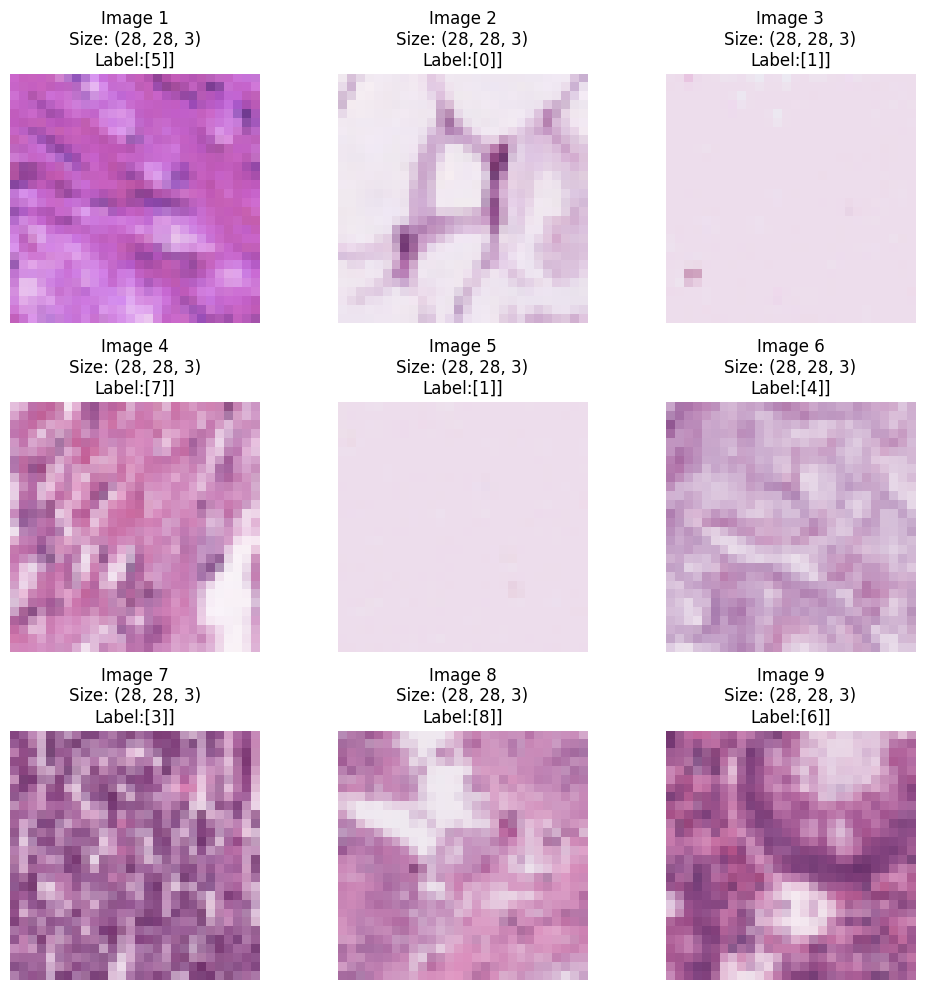

In [29]:

# Create a 3x3 grid for visualization
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Iterate through the first 9 images in the validation dataset
for i in range(9):
  row = i // 3
  col = i % 3
  axes[row, col].imshow(val_images[i], cmap='gray')
  axes[row, col].set_title(f"Image {i+1}\nSize: {val_images[i].shape}\nLabel:{val_labels[i]}]")
  axes[row, col].axis('off')

plt.tight_layout()
plt.show()

Folder to view the medmnist mapping: [medmnist_fileid](https://drive.google.com/drive/folders/1A_99qH_c-J0p_SatwSiaP_i1CvLUOzVo)

## Tasks


### Task 1

- Plot the already downloaded MEDNIST dataset such that an image from each of its class is plotted

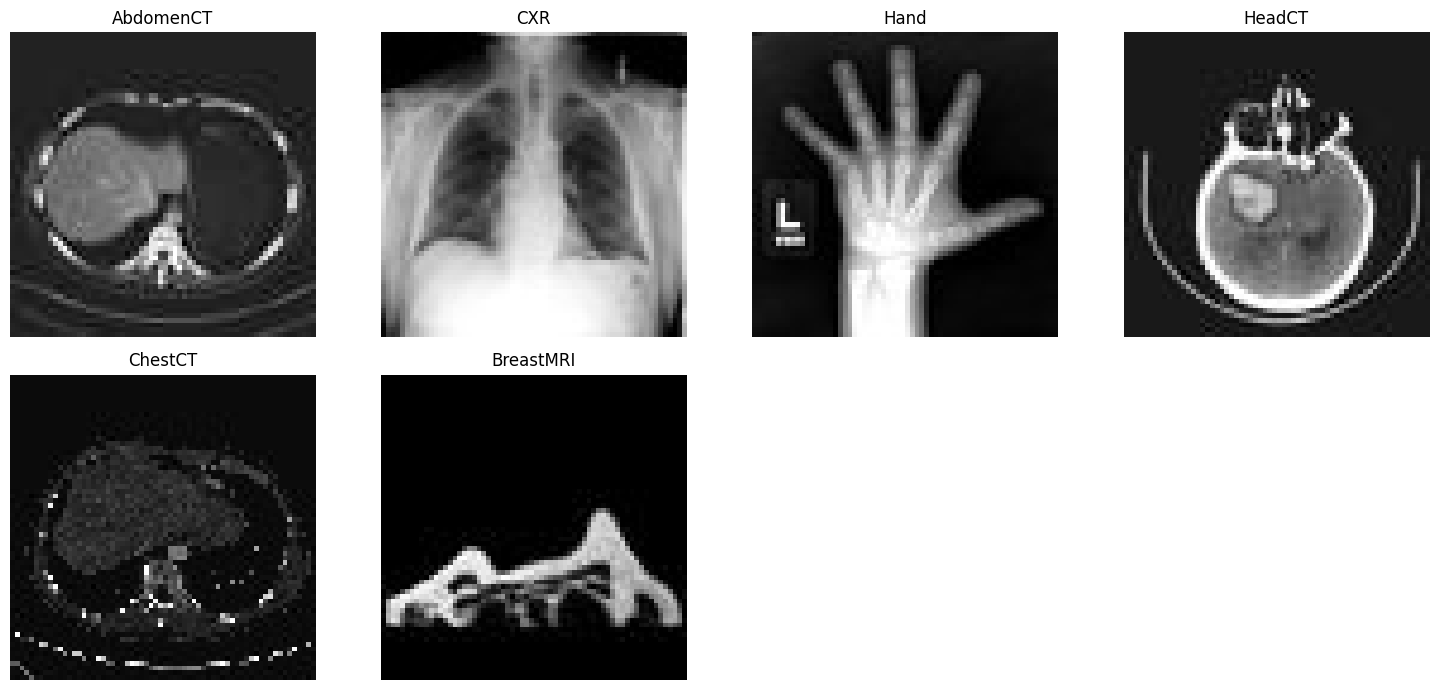

In [30]:
# prompt: Plot the already downloaded MEDNIST dataset such that an image from each of its class is plotted

import matplotlib.pyplot as plt
import os

mednist_folder = os.path.join(os.getcwd(), 'MedNIST')

if os.path.exists(mednist_folder):
  class_images = {}
  for subfolder in os.listdir(mednist_folder):
    subfolder_path = os.path.join(mednist_folder, subfolder)
    if os.path.isdir(subfolder_path):
      image_files = [os.path.join(subfolder_path, f) for f in os.listdir(subfolder_path) if f.endswith('.jpeg')]
      if image_files:
        class_images[subfolder] = image_files[0]  # Take the first image from each class

  if class_images:
    num_classes = len(class_images)
    rows = (num_classes + 3) // 4  # Adjust rows based on number of classes
    cols = min(num_classes, 4)
    plt.figure(figsize=(15, rows * 3.5))

    for i, (class_name, image_path) in enumerate(class_images.items()):
      plt.subplot(rows, cols, i + 1)
      image = plt.imread(image_path)
      plt.imshow(image, cmap='gray')
      plt.title(class_name)
      plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
  print("MedNIST folder not found.")

### Task 2

- Download the decathlon dataset for Spleen, such that you have train:val::60:40.
- Load samples into a dataset variable to visualize the mid slice of the 3D volume along with their labels

Task09_Spleen.tar: 1.50GB [00:50, 32.1MB/s]                            

2024-10-20 09:30:26,468 - INFO - Downloaded: /content/Task09_Spleen.tar


2024-10-20 09:30:30,022 - INFO - Verified 'Task09_Spleen.tar', md5: 410d4a301da4e5b2f6f86ec3ddba524e.
2024-10-20 09:30:30,025 - INFO - Writing into directory: /content.


Loading dataset: 100%|██████████| 16/16 [00:29<00:00,  1.87s/it]


The length of the training dataset is 25
The length of the validation dataset is 16
Image shape: torch.Size([512, 512, 168]), Label shape: torch.Size([512, 512, 168])


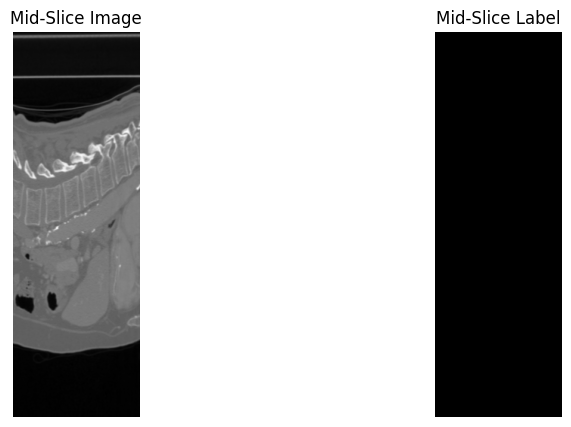

Image shape: torch.Size([512, 512, 77]), Label shape: torch.Size([512, 512, 77])


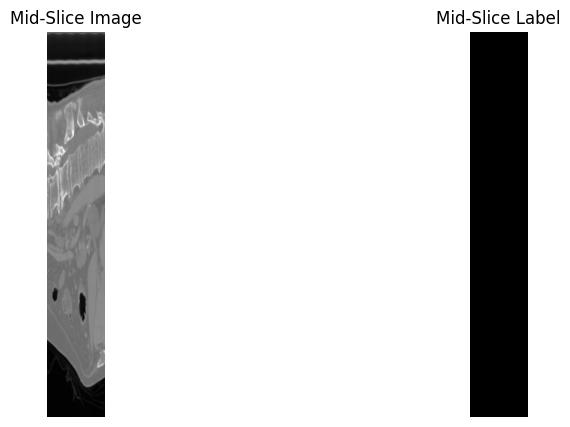

Image shape: torch.Size([512, 512, 87]), Label shape: torch.Size([512, 512, 87])


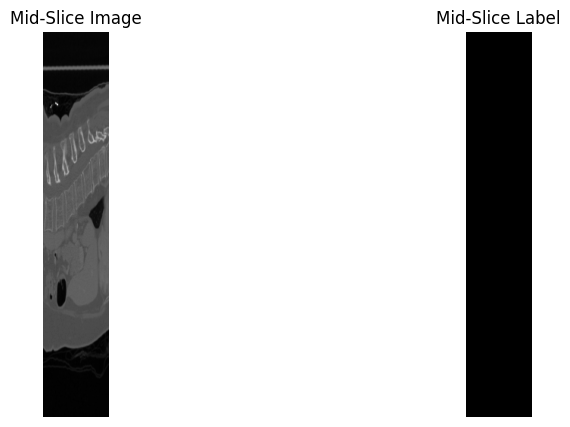

In [31]:
# prompt: Download the decathlon dataset for Spleen using monai, such that you have train:val::60:40.

# Specify the task number you want to access (e.g., Task09_Spleen)
task_num = "Task09_Spleen"

# Create a DecathlonDataset instance for the specified task with a 60:40 train:val split
train_decathlondataset = DecathlonDataset(root_dir=dir_path, task=task_num, section="training", download=True, val_frac=0.4, seed=123)
validation_decathlondataset = DecathlonDataset(root_dir=dir_path, task=task_num, section="validation", download=False, val_frac=0.4, seed=123)

print(f"The length of the training dataset is {len(train_decathlondataset)}")
print(f"The length of the validation dataset is {len(validation_decathlondataset)}")

# Load samples into a dataset variable to visualize the mid slice of the 3D volume along with their labels
for i in range(min(len(validation_decathlondataset), 3)):  # Visualize the first 3 validation samples
    data = validation_decathlondataset[i]
    image = data["image"]
    label = data["label"]
    print(f"Image shape: {image.shape}, Label shape: {label.shape}")

    mid_slice_image = image[image.shape[0] // 2, :, :]
    mid_slice_label = label[label.shape[0] // 2, :, :]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(mid_slice_image, cmap='gray')
    plt.title('Mid-Slice Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mid_slice_label, cmap='gray')
    plt.title('Mid-Slice Label')
    plt.axis('off')

    plt.show()